# Imports

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load data

In [48]:
loan = pd.read_csv('loan status.csv')

In [49]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Analysis and Processing

In [50]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Mapped Education Column

In [51]:
loan.Education = loan.Education.map({'Graduate':1, 'Not Graduate':0}).astype(int)

In [52]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Removed Loan_ID Column

In [53]:
loan.drop(columns = 'Loan_ID', inplace=True)

### Filled and Mapped Gender Column

In [54]:
loan.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [55]:
loan.fillna({'Gender':'Male'}, inplace=True)
loan.Gender = loan.Gender.map({'Female':1, 'Male':0}).astype(int)

### Filled and Mapped Self_Employed Column

In [56]:
loan.fillna({'Self_Employed':'No'}, inplace=True)
loan.Self_Employed = loan.Self_Employed.map({'Yes':1, 'No':0}).astype(int)

In [57]:
loan.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(3), int64(1), object(4)
memory usage: 50.5+ KB


### Filled and Mapped Dependents Column

In [59]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [60]:
loan.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [61]:
loan.fillna({'Dependents':'0'}, inplace=True)

In [62]:
loan.Dependents = loan.Dependents.map({'3+':3, '2':2, '1':1, '0':0}).astype(int)

In [63]:
loan.Dependents.unique()

array([0, 1, 2, 3])

### Filled and Mapped Married Column

In [64]:
def fill_missing_married_values(cols):
    married = cols[0]
    income = cols[1]
    
    if pd.isnull(married):
        if income > 0:
            return 'Yes'
        else:
            return 'No'
    else:
        return married

In [65]:
loan.Married = loan[['Married', 'CoapplicantIncome']].apply(fill_missing_married_values, axis = 1)

In [66]:
loan.Married = loan.Married.map({'Yes':1, 'No':0}).astype(int)

In [67]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [68]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filled and Mapped LoanAmount Column

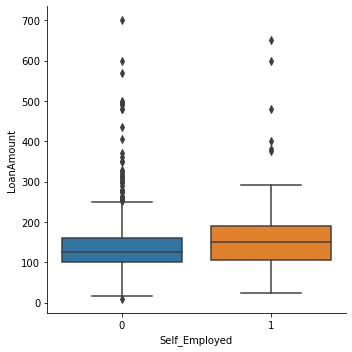

In [69]:
sns.catplot('Self_Employed', 'LoanAmount', data = loan, kind = 'box')

In [70]:
loan[loan.Self_Employed == 1].LoanAmount.mean()

172.0

In [71]:
loan[loan.Self_Employed == 0].LoanAmount.mean()

142.47173489278754

In [72]:
def fill_missing_loan_amt_values(cols):
    loan_amt = cols[0]
    self_emp = cols[1]
    
    if pd.isnull(loan_amt):
        if self_emp == 1:
            return loan[loan.Self_Employed == 1].LoanAmount.mean()
        else:
            return loan[loan.Self_Employed == 0].LoanAmount.mean()
    else:
        return loan_amt

In [73]:
loan.LoanAmount = loan[['LoanAmount', 'Self_Employed']].apply(fill_missing_loan_amt_values, axis = 1)
loan.LoanAmount = loan.LoanAmount.astype('int')

In [74]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filled Loan_Amount_Term Column

In [75]:
loan.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [76]:
loan.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

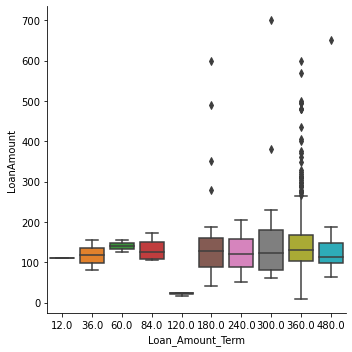

In [77]:
sns.catplot('Loan_Amount_Term', 'LoanAmount', data = loan, kind = 'box')

In [78]:
loan.fillna({'Loan_Amount_Term':360}, inplace=True)

### Filled Credit_History Column: Keep it is at a non-categorical value of nan

In [79]:
loan.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

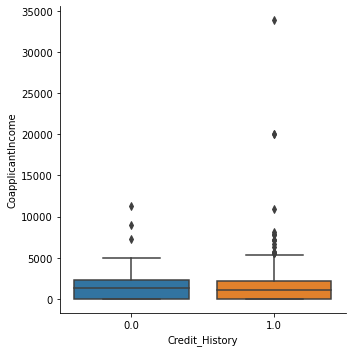

In [80]:
sns.catplot('Credit_History', 'CoapplicantIncome', data = loan, kind = 'box')

In [81]:
loan.Property_Area = loan.Property_Area.map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype('int')

In [82]:
loan.Loan_Status = loan.Loan_Status.map({'N':0, 'Y':1}).astype('int')

In [83]:
loan.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,142,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141,360.0,1.0,0,1
5,0,1,2,1,1,5417,4196.0,267,360.0,1.0,0,1
6,0,1,0,0,0,2333,1516.0,95,360.0,1.0,0,1
7,0,1,3,1,0,3036,2504.0,158,360.0,0.0,2,0
8,0,1,2,1,0,4006,1526.0,168,360.0,1.0,0,1
9,0,1,1,1,0,12841,10968.0,349,360.0,1.0,2,0


In [84]:
loan.CoapplicantIncome = loan.CoapplicantIncome.astype('int')

loan.fillna({'Credit_History':1.0}, inplace=True)
loan.Credit_History = loan.Credit_History.astype('int')
loan.Loan_Amount_Term = loan.Loan_Amount_Term.astype('int')

In [85]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int32
 7   LoanAmount         614 non-null    int32
 8   Loan_Amount_Term   614 non-null    int32
 9   Credit_History     614 non-null    int32
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(11), int64(1)
memory usage: 31.3 KB


# Train the model

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [87]:
X = loan.drop('Loan_Status', axis = 1)
y = loan.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [88]:
X_train.shape, X_test.shape

((411, 11), (203, 11))

In [89]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accurracy: ', accuracy_score(y_test, y_pred))

Accurracy:  0.7980295566502463


In [90]:
import pickle
pickle.dump(model, open(r'loan_model.pkl', 'wb'))

In [91]:
model = pickle.load(open('loan_model.pkl', 'rb'))

In [92]:
test_input = [0, 1, 1, 1, 0, 5000, 2000, 1000, 360, 1, 0]
test_input = np.array(test_input)
test_input = test_input.reshape(1, -1)
test_input
output = model.predict(test_input)
print(int(output))

1
